In [75]:
import pandas as pd

#analysis of day1
data = pd.read_csv("dds_ch2_nyt\\nyt1.csv")
data


,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


In [76]:
dataNoNullAge = data[(data.Age > 0) & (data.Signed_In == 1)]
dataNoNullAge

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458432,30,0,4,0,1
458433,21,1,2,0,1
458434,61,1,6,0,1
458435,51,0,7,0,1


In [77]:
def filterAge(age):
    if age < 18:
        return '<18'
    elif age <= 24:
        return '18-24'
    elif age <= 34:
        return '25-34'
    elif age <= 44:
        return '35-44'
    elif age <= 54:
        return '45-54'
    elif age <= 64:
        return '55-64'
    else:
        return '65+'

In [78]:
dataNoNullAge["Age_group"] = dataNoNullAge.Age.apply(lambda x: filterAge(x))
dataNoNullAge


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_95592\2251625814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNoNullAge["Age_group"] = dataNoNullAge.Age.apply(lambda x: filterAge(x))


,Age,Gender,Impressions,Clicks,Signed_In,Age_group
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458432,30,0,4,0,1,25-34
458433,21,1,2,0,1,18-24
458434,61,1,6,0,1,55-64
458435,51,0,7,0,1,45-54


In [79]:
groupedData = dataNoNullAge

In [80]:

ctr = groupedData[["Age", "Impressions", "Clicks", "Signed_In", "Age_group"]].groupby("Age_group").mean()
ctr["Ctr"] = ctr.Clicks/ctr.Impressions
ctr


,Age,Impressions,Clicks,Signed_In,Ctr
Age_group,,,,,
18-24,20.833317,5.002826,0.053251,1.0,0.010644
25-34,29.503352,4.993829,0.050486,1.0,0.010110
35-44,39.494680,5.021507,0.051679,1.0,0.010292
45-54,49.492580,5.010406,0.050274,1.0,0.010034
55-64,59.498189,5.022308,0.101837,1.0,0.020277
65+,72.988697,5.012347,0.151289,1.0,0.030183
<18,15.262149,5.007159,0.149335,1.0,0.029824


In [99]:
groupedData[["Impressions", "Clicks", "Age_group"]].groupby("Age_group").sum()

,Impressions,Clicks
Age_group,,
18-24,198535,2255
25-34,284893,2858
35-44,343978,3519
45-54,316180,3243
55-64,221115,4475
65+,142277,4169
<18,69275,2105


[Text(0.5, 0, 'CTR'), Text(0, 0.5, 'Age Group')]

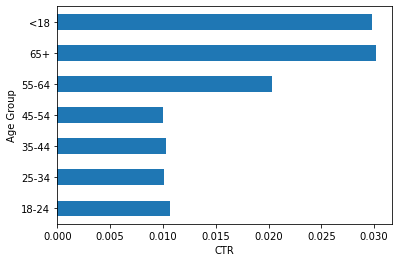

In [82]:
pltCtr = ctr["Ctr"].plot(kind="barh")
pltCtr.set(xlabel="CTR", ylabel="Age Group")

[Text(0, 0.5, 'Number of people')]

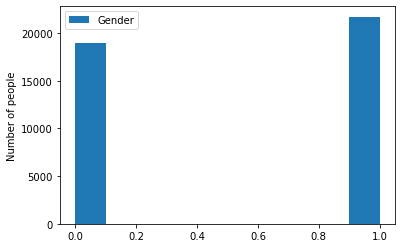

In [83]:
pltGender = groupedData[["Gender", "Age_group"]].groupby("Age_group").get_group("18-24").plot(kind="hist")
pltGender.set(ylabel="Number of people")


[Text(0, 0.5, 'Number of people')]

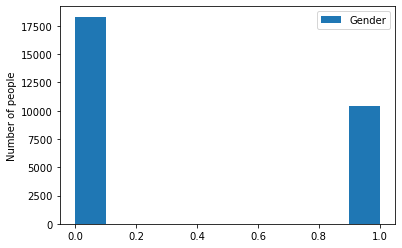

In [84]:
pltGender = groupedData[["Gender", "Age_group"]].groupby("Age_group").get_group("65+").plot(kind="hist")
pltGender.set(ylabel="Number of people")


<AxesSubplot:xlabel='Age_group', ylabel='Impression'>

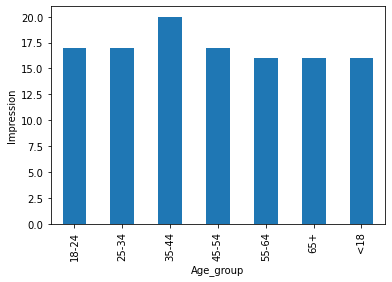

In [85]:
MaxImpressions = groupedData.groupby("Age_group").Impressions.max()
MaxImpressions.plot(kind="bar", ylabel="Impression")


<AxesSubplot:xlabel='Age_group', ylabel='Clicks'>

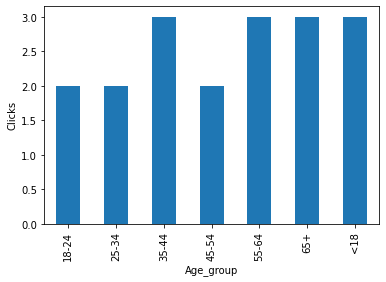

In [86]:
maxClicks = groupedData.groupby("Age_group").Clicks.max()
maxClicks.plot(kind="bar", ylabel="Clicks")


<AxesSubplot:xlabel='Age_group', ylabel='Clicks'>

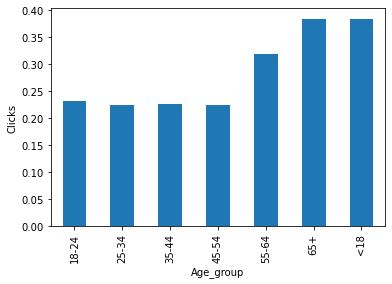

In [87]:
stdClicks = groupedData.groupby("Age_group").Clicks.std()
stdClicks.plot(kind="bar", ylabel="Clicks")


<AxesSubplot:xlabel='Age_group', ylabel='Clicks'>

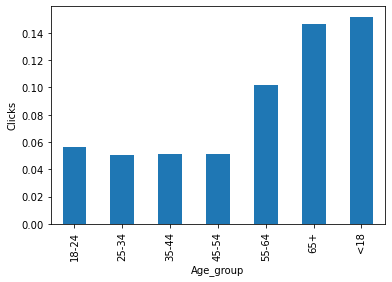

In [100]:
meanClicks = groupedData.groupby("Age_group").Clicks.mean()
meanClicks.plot(kind="bar", ylabel="Clicks")

<AxesSubplot:xlabel='Age_group', ylabel='Impression'>

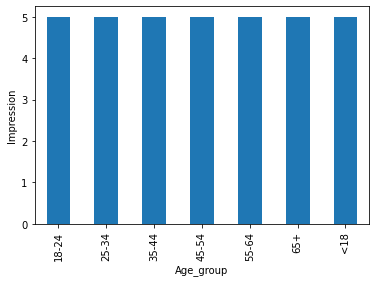

In [101]:
MedianImpressions = groupedData.groupby("Age_group").Impressions.median()
MedianImpressions.plot(kind="bar", ylabel="Impression")

<AxesSubplot:xlabel='Age_group', ylabel='Impression'>

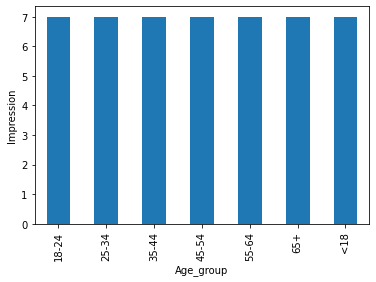

In [102]:
quantileImpressions = groupedData.groupby("Age_group").Impressions.quantile(q=0.8)
quantileImpressions.plot(kind="bar", ylabel="Impression")

In [103]:
finalTable = groupedData[["Age_group", "Impressions", "Clicks"]].groupby("Age_group").mean()
finalTable["Ctr"] = finalTable.Clicks / finalTable.Impressions
finalTable.rename(columns={"Clicks": "Mean Clicks"}, inplace=True)
finalTable["Max Impressions"] = MaxImpressions
finalTable["Median Impressions"] = MedianImpressions
finalTable["Quantile Impressions"] = quantileImpressions
finalTable["Max Clicks"] = maxClicks
finalTable["Std Clicks"] = stdClicks
finalTable = finalTable.drop(columns="Impressions")
finalTable

,Mean Clicks,Ctr,Max Impressions,Median Impressions,Quantile Impressions,Max Clicks,Std Clicks
Age_group,,,,,,,
18-24,0.056645,0.011358,16,5.0,7.0,2,0.239178
25-34,0.050230,0.010032,18,5.0,7.0,2,0.223983
35-44,0.051019,0.010230,16,5.0,7.0,3,0.225955
45-54,0.051227,0.010257,17,5.0,7.0,2,0.227166
55-64,0.101605,0.020238,16,5.0,7.0,3,0.318949
65+,0.146399,0.029302,17,5.0,7.0,3,0.383437
<18,0.151931,0.030386,15,5.0,7.0,3,0.386280


In [104]:
#analysis of day2
data2 = pd.read_csv("dds_ch2_nyt\\nyt2.csv")
data2NoNullAge = data2[(data2.Age > 0) & (data2.Signed_In == 1)]
data2NoNullAge["Age_group"] = data2NoNullAge.Age.apply(lambda x: filterAge(x))
data2NoNullAge

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_95592\365281438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2NoNullAge["Age_group"] = data2NoNullAge.Age.apply(lambda x: filterAge(x))


,Age,Gender,Impressions,Clicks,Signed_In,Age_group
0,48,1,3,0,1,45-54
2,15,1,4,0,1,<18
6,63,0,3,0,1,55-64
8,24,1,2,0,1,18-24
9,16,0,7,0,1,<18
...,...,...,...,...,...,...
449930,21,1,5,0,1,18-24
449931,37,1,9,0,1,35-44
449932,52,1,2,0,1,45-54
449933,22,1,0,0,1,18-24


[Text(0, 0.5, 'Number of people')]

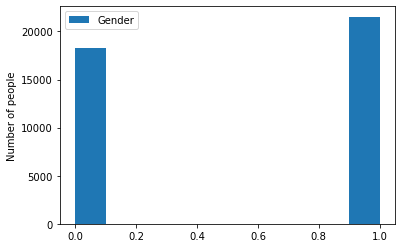

In [105]:
groupedData = data2NoNullAge
pltGender = groupedData[["Gender", "Age_group"]].groupby(
    "Age_group").get_group("18-24").plot(kind="hist")
pltGender.set(ylabel="Number of people")

[Text(0, 0.5, 'Number of people')]

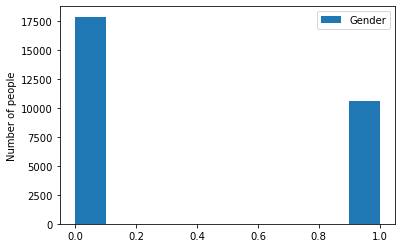

In [106]:
pltGender = groupedData[["Gender", "Age_group"]].groupby(
    "Age_group").get_group("65+").plot(kind="hist")
pltGender.set(ylabel="Number of people")

<AxesSubplot:xlabel='Age_group', ylabel='Impression'>

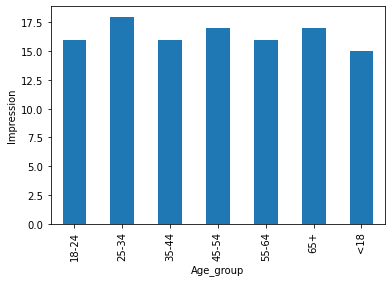

In [107]:
MaxImpressions = groupedData.groupby("Age_group").Impressions.max()
MaxImpressions.plot(kind="bar", ylabel="Impression")

<AxesSubplot:xlabel='Age_group', ylabel='Clicks'>

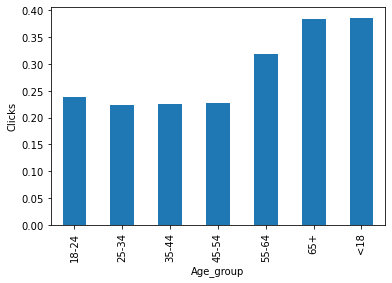

In [108]:
stdClicks = groupedData.groupby("Age_group").Clicks.std()
stdClicks.plot(kind="bar", ylabel="Clicks")

<AxesSubplot:xlabel='Age_group', ylabel='Impression'>

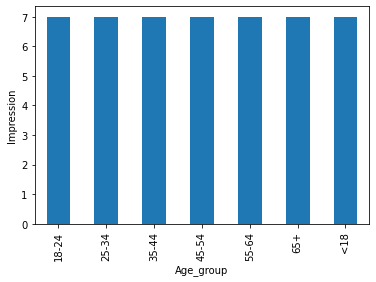

In [109]:
MedianImpressions = groupedData.groupby("Age_group").Impressions.median()
MedianImpressions.plot(kind="bar", ylabel="Impression")
quantileImpressions = groupedData.groupby(
    "Age_group").Impressions.quantile(q=0.8)
quantileImpressions.plot(kind="bar", ylabel="Impression")

In [110]:
finalTable2 = groupedData[["Age_group", "Impressions", "Clicks"]].groupby(
    "Age_group").mean()
finalTable2["Ctr"] = finalTable2.Clicks / finalTable2.Impressions
finalTable2.rename(columns={"Clicks": "Mean Clicks"}, inplace=True)
finalTable2["Max Impressions"] = MaxImpressions
finalTable2["Median Impressions"] = MedianImpressions
finalTable2["Quantile Impressions"] = quantileImpressions
finalTable2["Max Clicks"] = maxClicks
finalTable2["Std Clicks"] = stdClicks
finalTable2 = finalTable2.drop(columns="Impressions")
finalTable2

,Mean Clicks,Ctr,Max Impressions,Median Impressions,Quantile Impressions,Max Clicks,Std Clicks
Age_group,,,,,,,
18-24,0.056645,0.011358,16,5.0,7.0,2,0.239178
25-34,0.050230,0.010032,18,5.0,7.0,2,0.223983
35-44,0.051019,0.010230,16,5.0,7.0,3,0.225955
45-54,0.051227,0.010257,17,5.0,7.0,2,0.227166
55-64,0.101605,0.020238,16,5.0,7.0,3,0.318949
65+,0.146399,0.029302,17,5.0,7.0,3,0.383437
<18,0.151931,0.030386,15,5.0,7.0,3,0.386280
